The durations are indicative and obviously depend on each person. If you see that you can't finish an exercise in time, don't hesitate to move to the next exercise.

If you don't have time to finish everything, you can start again this weekend or next week. You will simply indicate in the comments the scripts you have completed afterwards.

# Part 1 - API - around 1h

The following dataset lists a selection of the best restaurants in Paris, at very affordable prices (less than 15 euros per menu on average).
You will use this  [API](https://adresse.data.gouv.fr/api-doc/adresse), to retrieve coordinate points (lon, lat) for each restaurants.



In [151]:
import pandas as pd
import requests
import numpy as np
import json
import folium
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
food_paris = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/food.csv").drop(columns = "Unnamed: 0")

In [100]:
food_paris.head()

,nom,adresse,code postal
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris
2,Pizz'Aria,55 Rue Montmartre,75002 Paris
3,M La Vie,85 Rue Montmartre,75002 Paris
4,Road Trip,36 Rue Poissonnière,75002 Paris


In [101]:
def get_cordinates(adress):
  url =f"https://api-adresse.data.gouv.fr/search/?q={adress}"
  response = requests.get(url)
  if response.status_code == 200:
    data = response.json()
    return data["features"][0]["geometry"]["coordinates"]
  else:
    return np.nan
food_paris["coordinates"] = food_paris["adresse"].apply(get_cordinates)


def switch_coord(coordinates):
  return (coordinates[1], coordinates[0])
food_paris["coordinates"] = food_paris["coordinates"].apply(switch_coord)
food_paris

,nom,adresse,code postal,coordinates
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris,"(48.960541, 2.585962)"
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris,"(48.74075, 2.303353)"
2,Pizz'Aria,55 Rue Montmartre,75002 Paris,"(48.865983, 2.344484)"
3,M La Vie,85 Rue Montmartre,75002 Paris,"(48.867596, 2.343757)"
4,Road Trip,36 Rue Poissonnière,75002 Paris,"(48.869951, 2.34794)"
5,Rolls,29 Rue des Jeuneurs,75002 Paris,"(48.869541, 2.344421)"
6,Qasti Shawarma,214 Rue Saint-Martin,75003 Paris,"(48.863752, 2.35287)"
7,The Brooklyn Pizzeria,33 Bd Beaumarchais,75003 Paris,"(48.932462, 2.288185)"
8,La Baguette du relais,10 Rue des Archives,75004 Paris,"(50.643471, 3.060316)"
9,Olive & Thym,60 Rue Quincampoix,75004 Paris,"(48.861576, 2.35082)"


# Folium

You will now project these restaurants on a map, using the `Folium` library.

In [102]:
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)


for inde, row in food_paris.iterrows():
  folium.Marker(location=row["coordinates"], popup=row["nom"]).add_to(m)

m

# Sorting and grouping

You can now build a descending ranking,  considering the number of restaurants per district.

In [103]:
rastaurant_nb = food_paris['code postal'].value_counts().reset_index()
rastaurant_nb.columns = ['code postal', 'nb_restaurants']
rastaurant_nb = rastaurant_nb.sort_values(by='nb_restaurants', ascending=False)
rastaurant_nb

,code postal,nb_restaurants
0,75002 Paris,5
1,75009 Paris,4
2,75010 Paris,4
3,75011 Paris,3
4,75001 Paris,2
5,75003 Paris,2
6,75004 Paris,2
7,75006 Paris,2
8,75008 Paris,2
9,75007 Paris,1


# Part 2 - Data exploration & processing - Python & Pandas - around 30 min

Run the code below. You will get a DataFrame with 10 000 restaurant comments.
- date: the date of the comment
- stars: the rating (from 1 to 5)
- text: the text of the review
- useful: the number of users who indicated this comment as "useful"
- sentiment: the word "good" or "bad" depending on the stars rating

The goal of these parts will be to explore this dataset, then to propose a prediction model of positive rating according to the other features.

Start by checking that there are no missing values.

In [104]:
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


In [105]:
skim(df_restaurants)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ stars             │    0 │       0 │    3.777 │    1.215 │    1 │     3 │     4 │     5 │      5 │ ▂▂ ▃▇▇  │  │
│ │ useful            │    0 │       0 │    1.409 │    2.337 │    0 │     0 │     1 │     2 │     76 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴──────────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date                      │       0 │          0 │                            1 │                    10000 │  │
│ │ text                      │       0 │          0 │                          130 │                  1328734 │  │
│ │ sentiment                 │       0 │          0 │                            1 │                    10000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [106]:
df_restaurants.duplicated(keep=False).sum()

2

In [107]:
duplicate = df_restaurants[df_restaurants.duplicated(keep=False)]
duplicate

,date,stars,text,useful,sentiment
4372,2012-06-16,2,This review is for the chain in general. The l...,0,bad
9680,2012-06-16,2,This review is for the chain in general. The l...,0,bad


In [108]:
df_restaurants = df_restaurants.drop_duplicates()

In [109]:
df_restaurants.duplicated(keep=False).sum()

0

In [110]:
date_to_datetime = lambda x: pd.to_datetime(x)
df_restaurants["date"] = df_restaurants["date"].apply(date_to_datetime)

<ipython-input-110-d0a0001e21d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants["date"] = df_restaurants["date"].apply(date_to_datetime)


In [111]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       9999 non-null   datetime64[ns]
 1   stars      9999 non-null   int64         
 2   text       9999 non-null   object        
 3   useful     9999 non-null   int64         
 4   sentiment  9999 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 468.7+ KB


## Column "text"

Use **apply** to create a new column `len_text`, indicating the length (number of characters) of each comment.

Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?

In [112]:
df_restaurants.loc[:,"len_text"] = df_restaurants["text"].apply(len)
df_restaurants

<ipython-input-112-ac08f7c6f2da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants.loc[:,"len_text"] = df_restaurants["text"].apply(len)


,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good,469
...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad,880


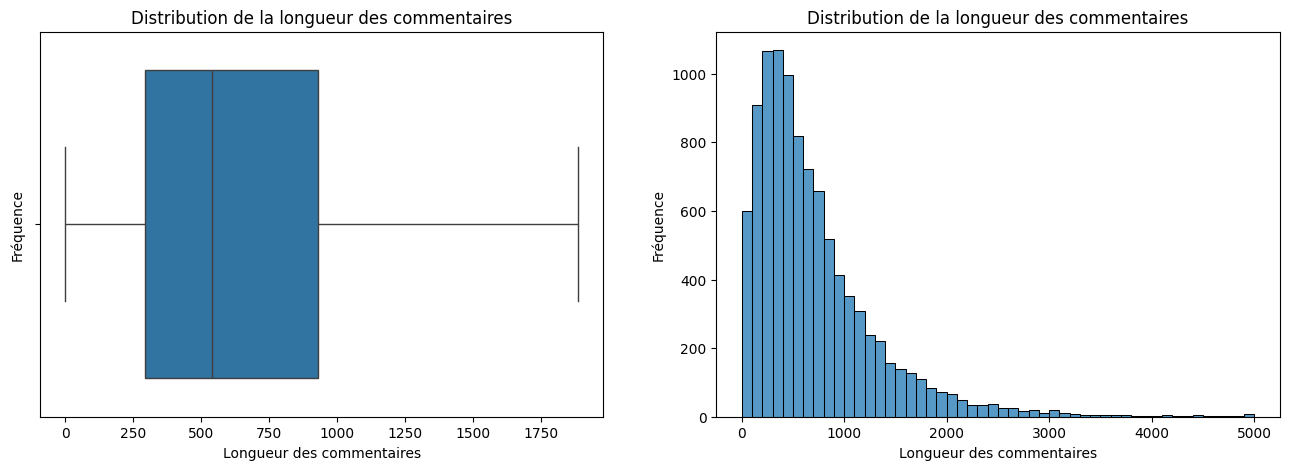

count    9999.000000
mean      710.635064
std       617.343710
min         1.000000
25%       294.000000
50%       541.000000
75%       930.000000
max      4997.000000
Name: len_text, dtype: float64

In [113]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(x="len_text", data=df_restaurants, showfliers=False)
plt.title('Distribution de la longueur des commentaires')
plt.xlabel('Longueur des commentaires')
plt.ylabel('Fréquence')

plt.subplot(1,2,2)
sns.histplot( x="len_text", data=df_restaurants, bins=50)
plt.title('Distribution de la longueur des commentaires')
plt.xlabel('Longueur des commentaires')
plt.ylabel('Fréquence')


plt.show()
df_restaurants['len_text'].describe()
#la plupart des commentaires sont plutot long et plutot réparties entre le 50éme et 75éme percentile

## Column "stars"

- Draw a scatterplot to compare the `useful` column and the `stars` column. Do you think there is a correlation? Please compute the correlation coefficient.

- Ditto between `len_text` and `useful`.

- Please comment and interpret the results.



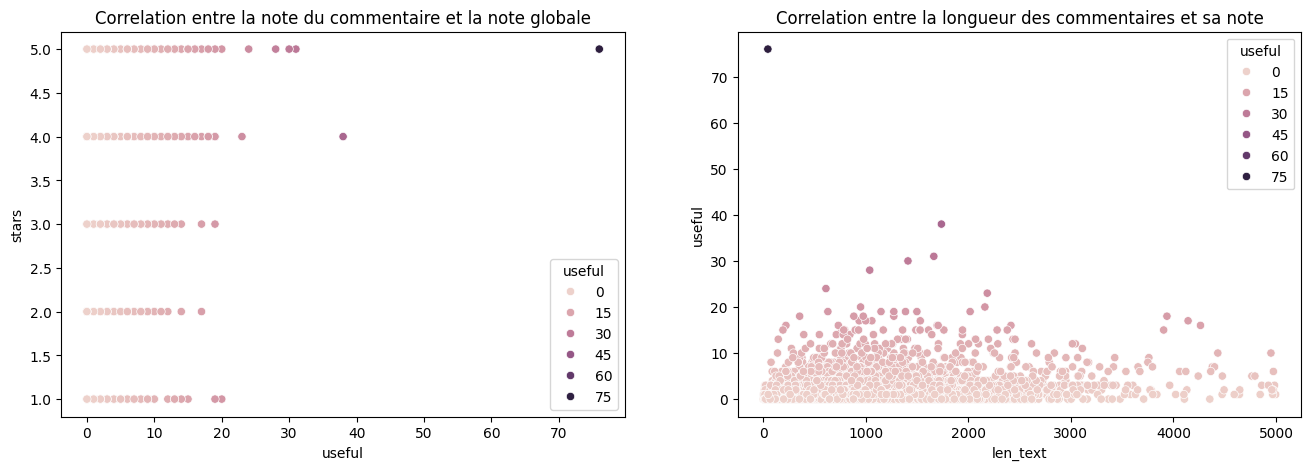

In [114]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.scatterplot(x="useful", y="stars", data=df_restaurants, hue='useful')
plt.title('Correlation entre la note du commentaire et la note globale')
plt.xlabel('useful')
plt.ylabel('stars')

plt.subplot(1,2,2)
sns.scatterplot(x="len_text", y="useful", data=df_restaurants, hue='useful')
plt.title('Correlation entre la longueur des commentaires et sa note')
plt.xlabel('len_text')
plt.ylabel('useful')

plt.show()

# la colonne 'useful' je l'ai compris comme une note du commentaire, en notaznt celui ci comme pertinent ou pas, ci cela a etais utile ou pas

In [115]:
def get_correlation(column1, column2=df_restaurants['useful']):
  correlation_result = round(column1.corr(column2), 3)
  if 0 < correlation_result <= 0.399:
    return f"La correlation entre {column1.name} et {column2.name} est de {correlation_result}, il y a une faible correlation entre ces deux variables"
  elif 0.4 < correlation_result <= 0.5:
    return f"La correlation entre {column1.name} et {column2.name} est de {correlation_result}, il y a une moyenne correlation entre ces deux variables"
  elif 0.6 < correlation_result <= 0.799:
    return f"La correlation entre {column1.name} et {column2.name} est de {correlation_result}, il y a une forte correlation entre ces deux variables"
  elif 0.8 < correlation_result <= 1:
    return f"La correlation entre {column1.name} et {column2.name} est de {correlation_result}, il y a une très forte correlation entre ces deux variables"
  else:
    return f"La correlation entre {column1.name} et {column2.name} est de {correlation_result}, il y a une très faible correlation entre ces deux variables"


print(get_correlation(df_restaurants['len_text']))
print(get_correlation(df_restaurants['stars']))

La correlation entre len_text et useful est de 0.294, il y a une faible correlation entre ces deux variables
La correlation entre stars et useful est de -0.024, il y a une très faible correlation entre ces deux variables


# Part 3 : NLP - Sentiment analysis classification - 2h

Define `X` which will contain only the `text` column. And `y` will be the `sentiment` column.

In [116]:
X = df_restaurants['text']
y = df_restaurants['sentiment']

## Create a function to clean up stopwords and punctuation

You can call your function `func_clean`.
Your function must take a `str` as a single parameter, and return a `str`.

For example:

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [118]:
def func_clean(text) -> str:
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

func_clean("Hello, how are you? Fine, thank you.")

'hello fine thank'

## Apply this function

Apply this function to `X` and store the result in `X_clean`.

In [119]:
X_clean = X.apply(func_clean)

## Train test split

Split your `X_clean` and `y` data with a train test split, and the same `random_state = 32`.



In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=32)

## TfidfVectorizer

- Train `TfidfVectorizer` on `X_train`.
- Transform `X_train` with your vectorizer and store the result in `X_train_vecto`.
- Transform `X_test` with your vectorizer and store the result in `X_test_vecto`.

In [127]:
tfidf = TfidfVectorizer()
X_train_vecto = tfidf.fit_transform(X_train)
X_test_vecto = tfidf.transform(X_test)

## Logistic regression

Train a logistic regression on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Also display a confusion matrix for the test set. How many "bad" comments are correctly predicted?

In [140]:
model_LG = LogisticRegression().fit(X_train_vecto, y_train)
train_score = round(model_LG.score(X_train_vecto, y_train), 3)
test_score = round(model_LG.score(X_test_vecto, y_test), 3)
print(f"Le score de l'entrainement est de {train_score}")
print(f"Le score du test est de {test_score}")
if train_score > test_score:
  print("Il y a un risque d'overfitting")

Le score de l'entrainement est de 0.899
Le score du test est de 0.83
Il y a un risque d'overfitting


In [141]:
y_pred = model_LG.predict(X_test_vecto)

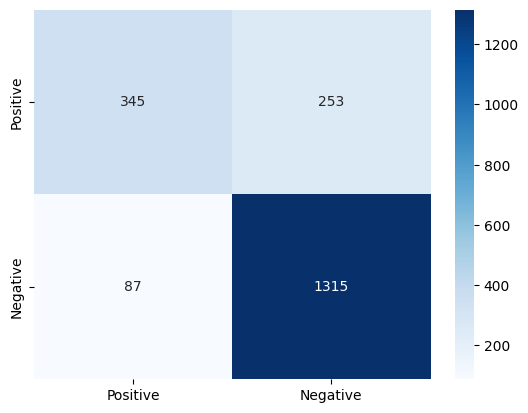

In [156]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.show()

## Decision tree
Train a decision tree on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting? Are the scores better than previously?

In [150]:
model_DT = DecisionTreeClassifier().fit(X_train_vecto, y_train)
train_score_DT = round(model_DT.score(X_train_vecto, y_train), 3)
test_score_DT = round(model_DT.score(X_test_vecto, y_test), 3)
print(f"Le score de l'entrainement est de {train_score_DT}")
print(f"Le score du test est de {test_score_DT}")
if train_score_DT > test_score_DT:
  print("Il y a un risque d'overfitting")

  "le scores d'entrainement est parfait mais le score des test est beaucoup plus faible ce qui nous crée de l'overfitting"

Le score de l'entrainement est de 1.0
Le score du test est de 0.711
Il y a un risque d'overfitting


In [154]:
y_pred2 = model_DT.predict(X_test_vecto)

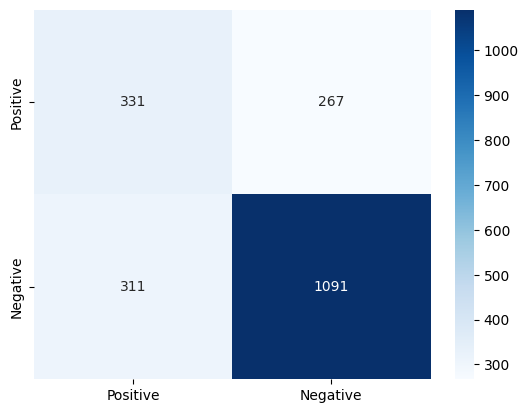

In [157]:
matrix2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.show()

## Bonus question (optional)

Use `GridsearchCV` to find the best parameters.
Make sure you don't do more than 1000 different iterations (i.e. combinations).
Otherwise, the time may seem very long...





In [ ]:
model_RF = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)


grid_search.fit(X_train_vecto, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Meilleurs paramètres : {best_params}")

best_model = grid_search.best_estimator_
train_score = best_model.score(X_train_vecto, y_train)
test_score = best_model.score(X_test_vecto, y_test)
print(f"Score d'entraînement : {train_score}")
print(f"Score de test : {test_score}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [ ]:
y_pred3 = best_model.predict(X_test_vecto)

matrix3 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.show()

# Optionnel : Algorithme `JSON` et manipulation.
This is a json file containing several keys.
Each key has a value, which could potentially be another key, containing another value, which could potentially be another key etc...

In [120]:
food = {
  "clé1": {
    "fruit1": "pomme",
    "légume4": "brocoli"
  },
  "clé2": {
    "légume1": "carotte",
    "fruit5": "banane",
    "légume3": "courgette"
  },
  "clé3": {
    "niveau1": {
      "niveau2": {
        "fruit3": "orange",
        "légume5": "aubergine",
        "fruit5": "mangue"
      }
    }
  },
  "clé4": {
    "niveau1": {
      "niveau2": {
        "niveau3": {
          "fruit6": "raisin",
          "fruit7": "fraise",
          "légume4": "poivron",
          "fruit2": "pastèque"
        }
      }
    }
  }
}


Problem:
Fruits and vegetables have been misplaced in this json file. The goal is to retrieve each of the fruits and vegetables, and assign them to two corresponding lists: `fruits_list` & `vegetables_list`.

Expected solution:

`fruits_list` = `['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']`

`vegetables_list` = `['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']`



In [ ]:
fruits_list = ['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']
vegetables_list = ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']

fruits_list_2 = []
vegetables_list_2 = []

def  get_fruits_vegetables(food):
  if isinstance(food, dict):
    for k, v in food.items():
      get_fruits_vegetables(v)
  elif isinstance(food, list):
    for item in food:
      get_fruits_vegetables(item)
  else:
    if food in fruits_list:
      fruits_list_2.append(food)
    elif food in vegetables_list:
      vegetables_list_2.append(food)

get_fruits_vegetables(food)
print(fruits_list_2)
print(vegetables_list_2)

Next, you'll create a new dictionary, which will simply contain two keys: `fruits` & `vegetables`. Each key will have the value of the list of fruits and the list of vegetables. That way, everything will be in order.

Expected solution:
`food_dict` = `{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}`

In [ ]:
fruits_dict = {
    'fruits': fruits_list_2,
    'vegetables': vegetables_list_2
}
print(fruits_dict)